# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [4]:
# enter your code here
model = sm.OLS.from_formula("BMXBMI~RIDAGEYR", data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0991
Time:                        10:29:13   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

higher

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

there could be a one-way positive relationship, but its so close that I'm not confident

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [13]:
y = result.params[1]*20
y

0.18223686491652596

by about 0.18 BMI points more

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

0.001 or 0.1%

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [15]:
# enter your code here
#recodeing ethnic groups
da['RIDRETH1x'] = da.RIDRETH1.replace({1:'MexAmer', 2:"OtherHisp",
                                      3:"White", 4:"Black", 5:'Other'})
da['RIAGENDRx'] = da.RIAGENDR.replace({1:'Male', 2:"Female"})

model2= sm.OLS.from_formula('BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx', data=da)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.98e-59
Time:                        10:47:20   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 30.7862      0.346     89.041      0.000      30.108      31.464
RIDRETH1x[T.MexAmer]       0.4499      0.308      1.460      0.144      -0.154       1.054
RIDRETH1x[T.Other]        -4.3299      0.322    -13.452      0.000      -4.961      -3.699
RIDRETH1x[T.OtherHisp]    -0.4879      0.333     -1.465      0.143      -1.141       0.165
RIDRETH1x[T.White]        -1.4055      0.267     -5.262      0.000      -1.929      -0.882
RIAGENDRx[T.Male]         -1.0226      0.190     -5.370      0.000      -1.396      -0.649
RIDAGEYR                   0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

the coefficient went down and the p-value went up, making us less confident of a relationship

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

the standard error went down

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

In [16]:
result2.rsquared-result.rsquared

0.05430315045104106

the R-squared increased by 0.054 or 5.4 percentage points

__Q2d.__ What reference level did the software select for the ethnicity variable?

Black

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

In [18]:
y = result2.params[6]*10
y

0.06495712926277578

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [19]:
y = result2.params[1]*1
y2 = result2.params[5]*1
y-y2

1.4725593880908088

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [20]:
# enter your code here
da25 = da.sample(frac=0.25)
model3= sm.OLS.from_formula('BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx', data=da25)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     10.81
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           9.42e-12
Time:                        11:21:36   Log-Likelihood:                -4296.2
No. Observations:                1276   AIC:                             8606.
Df Residuals:                    1269   BIC:                             8642.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 30.9197      0.722     42.819      0.000      29.503      32.336
RIDRETH1x[T.MexAmer]       1.5516      0.649      2.392      0.017       0.279       2.824
RIDRETH1x[T.Other]        -3.5450      0.688     -5.154      0.000      -4.894      -2.196
RIDRETH1x[T.OtherHisp]     0.0916      0.685      0.134      0.894      -1.252       1.435
RIDRETH1x[T.White]        -1.1536      0.563     -2.047      0.041      -2.259      -0.048
RIAGENDRx[T.Male]         -0.8286      0.395     -2.099      0.036      -1.603      -0.054
RIDAGEYR                  -0.0011      0.011     -0.093      0.926      -0.023       0.021
==============================================================================
Omnibus:                      223.628   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.003
Skew:                           1.065   Prob(JB):                     3.42e-90
Kurtosis:                       4.792   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

intercept: coef slight __increase__, std error __increase__
mexamer: coef __increase__, std error __increase__
other: coef __increase__, std error __increase__
otherHis: coef __increase__ directional change, std error __increase__
white : coef __increasee__ , std error __increase__
male: coef __increase__, std error __increase__
age: coef _decrease_ , std error __increase__

for the most part they all increased

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

/home/jordan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'residuals')

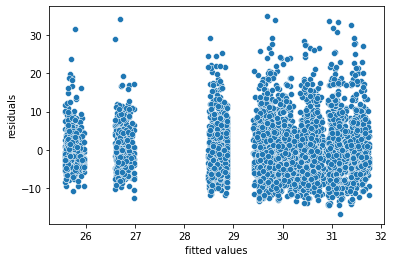

In [22]:
# enter your code here
pp = sns.scatterplot(result2.fittedvalues, result2.resid)
pp.set_xlabel('fitted values')
pp.set_ylabel('residuals')

__Q4a.__ What mean/variance relationship do you see?

variance tends to increase as BMI goes up

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [25]:
da.BPXSY1.mean()

125.62681301450412

/home/jordan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jordan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


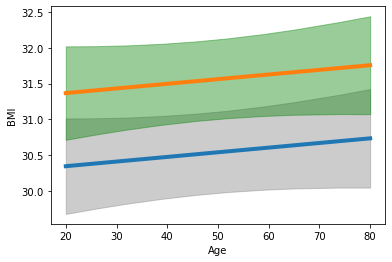

In [28]:
# enter your code here
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Male", "RIAGENDR": 1, 'BPXSY1':125.63,
          "DMDEDUC2": 1, "RIDRETH1": 1, "RIDRETH1x": 'MexAmer',
          "SMQ020": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result2, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

values2 = {"RIAGENDRx": "Female", "RIAGENDR":2, 'BPXSY1':125.63,
          "DMDEDUC2": 1, "RIDRETH1": 1, "RIDRETH1x": 'MexAmer',
          "SMQ020": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr2, cb2, fv2 = predict_functional(result2, "RIDAGEYR",
                values=values2, ci_method="simultaneous")

ax = sns.lineplot(fv2, pr2, lw=4)
ax.fill_between(fv2, cb2[:, 0], cb2[:, 1], color='green', alpha=0.4)

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

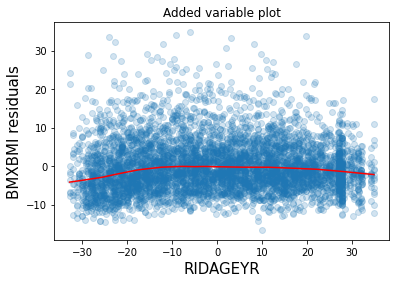

In [29]:
# enter your code here
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

In [30]:
da.RIDAGEYR.min()

20

BMI increases faster for the first 15 years of age (so from 20yrs to 35yrs) after that it seems to remain flat to maybe slightly decreasing for the next 35 years (35 to 70 years) where then there seems to be a decreasing trend

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [42]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", 
        "BMXBMI", "SMQ020", 'ALQ110']
da = da[vars].dropna()

#recodeing ethnic groups
da['RIDRETH1x'] = da.RIDRETH1.replace({1:'MexAmer', 2:"OtherHisp",
                                      3:"White", 4:"Black", 5:'Other'})
da['RIAGENDRx'] = da.RIAGENDR.replace({1:'Male', 2:"Female"})

In [43]:
da.ALQ110.size

1473

In [47]:
# enter your code here
da['alc12'] = da.ALQ110.replace({2:0, 7:np.nan, 9:np.nan})

In [49]:
#create crosstab (of counts)
c = pd.crosstab(da.RIAGENDRx, da.alc12)
c

alc12,0.0,1.0
RIAGENDRx,,
Female,569,467
Male,232,200


In [51]:
#normalize crosstab to create proabilities
c = c.apply(lambda x: x/x.sum(), axis = 1)
c

alc12,0.0,1.0
RIAGENDRx,,
Female,0.549228,0.450772
Male,0.537037,0.462963


In [53]:
#create odds column
c['odds'] = c.loc[:,0]/c.loc[:,1]
c

alc12,0.0,1.0,odds
RIAGENDRx,,,
Female,0.549228,0.450772,1.218415
Male,0.537037,0.462963,1.160000


In [55]:
c.odds.Female/c.odds.Male

1.0503581185852469

In [56]:
c['logodds'] = np.log(c.odds)
c

alc12,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.549228,0.450772,1.218415,0.197551
Male,0.537037,0.462963,1.160000,0.148420


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

no

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

the are nearly the same, yet it is more likely that women drink than men

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [57]:
# enter your code here
model = sm.GLM.from_formula('alc12~RIAGENDRx', family = sm.families.Binomial(), data = da)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  alc12   No. Observations:                 1468
Model:                            GLM   Df Residuals:                     1466
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.3
Date:                Wed, 07 Oct 2020   Deviance:                       2022.6
Time:                        13:45:53   Pearson chi2:                 1.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1976      0.062     -3.164      0.002      -0.320      -0.075
RIAGENDRx[T.Male]     0.0491      0.115      0.427      0.669      -0.176       0.274
=====================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

there is no statistical evidence to support that drinking rates differ

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [58]:
#create education variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

In [59]:
# enter your code here
model2 = sm.GLM.from_formula('alc12 ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x', family = sm.families.Binomial(), data = da)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  alc12   No. Observations:                 1467
Model:                            GLM   Df Residuals:                     1460
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -987.65
Date:                Wed, 07 Oct 2020   Deviance:                       1975.3
Time:                        13:55:35   Pearson chi2:                 1.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4849      0.193     -2.519      0.012      -0.862      -0.108
RIAGENDRx[T.Male]            0.0313      0.117      0.267      0.789      -0.198       0.261
DMDEDUC2x[T.HS]             -0.0278      0.163     -0.170      0.865      -0.348       0.292
DMDEDUC2x[T.SomeCollege]     0.1147      0.152      0.756      0.450      -0.183       0.412
DMDEDUC2x[T.lt9]            -0.8479      0.176     -4.814      0.000      -1.193      -0.503
DMDEDUC2x[T.x9_11]          -0.4496      0.190     -2.367      0.018      -0.822      -0.077
RIDAGEYR                     0.0090      0.003      2.975      0.003       0.003       0.015
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

at a significance level of \\(\alpha\\) = 0.05, age, education at less than 9 years, and 9-11 years

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

In [60]:
logodds = result2.params[0] + result2.params[6]*50
logodds

-0.034199548449017514

In [61]:
odds = np.exp(logodds)
odds

0.9663786460358491

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

In [63]:
collegeLog = result2.params[0]
collegeOdds = np.exp(collegeLog)

highLog = result2.params[0] + result2.params[2]*1
highOdds = np.exp(highLog)

oddRatio = collegeOdds/highOdds
oddRatio

1.0282054968791363

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

coefficient decreased a bit

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

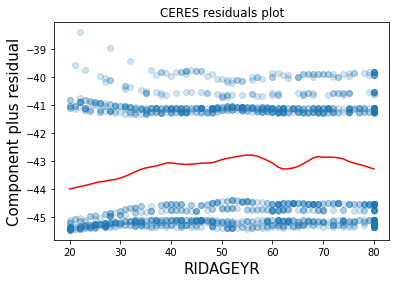

In [64]:
# enter your code here
fig = result2.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?

the plot suggests that the odds for drinking rises from 20 to about 55 years of age and then drops from 55 to 65 befor another rise between 65 and 70